In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')


In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train['label']
train.drop(labels=['label'], inplace = True, axis=1)

In [5]:
train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [7]:
y_test = test['label']
test.drop(labels=['label'], inplace = True, axis=1)

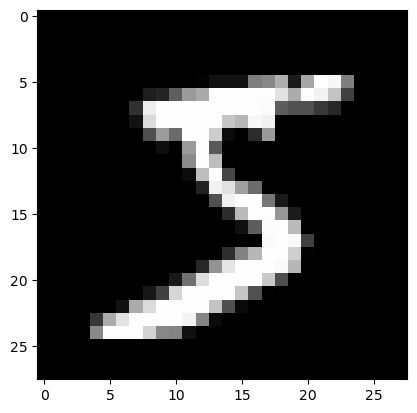

In [8]:
import matplotlib.pyplot as plt 

single_image = np.array(train.iloc[0]).reshape(28,28)
plt.imshow(single_image, cmap = 'gray')

In [9]:
temp = []

for entry in y_test:
    vec = [0]*10
    vec[entry] = 1
    
    temp.append(vec)
    
y_test = temp

temp = []

for entry in y_train:
    vec = [0]*10
    vec[entry] = 1
    
    temp.append(vec)
    
y_train = temp




In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential, layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
model = Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(784,)))
model.add(layers.Dense(784, activation='relu'))       
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()         
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(train), np.array(y_train), epochs=10, batch_size=32, validation_data = (np.array(test), np.array(y_test)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.4002 - accuracy: 0.9140 - val_loss: 0.2205 - val_accuracy: 0.9455
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1952 - accuracy: 0.9503 - val_loss: 0.1762 - val_accuracy: 0.9554
Epoch 3/10
1875/18

In [12]:
preds = model.predict(np.array(test))

for i, pred in enumerate(preds):
    pred = list(pred)
    print(f"Pred: {pred.index(max(pred))} Actual: {y_test[i].index(max(y_test[i]))}")

313/313 [==============================] - 1s 4ms/step
Pred: 7 Actual: 7
Pred: 2 Actual: 2
Pred: 1 Actual: 1
Pred: 0 Actual: 0
Pred: 4 Actual: 4
Pred: 1 Actual: 1
Pred: 4 Actual: 4
Pred: 9 Actual: 9
Pred: 6 Actual: 5
Pred: 4 Actual: 9
Pred: 0 Actual: 0
Pred: 6 Actual: 6
Pred: 9 Actual: 9
Pred: 0 Actual: 0
Pred: 1 Actual: 1
Pred: 5 Actual: 5
Pred: 9 Actual: 9
Pred: 7 Actual: 7
Pred: 3 Actual: 3
Pred: 4 Actual: 4
Pred: 9 Actual: 9
Pred: 6 Actual: 6
Pred: 4 Actual: 6
Pred: 3 Actual: 5
Pred: 4 Actual: 4
Pred: 0 Actual: 0
Pred: 7 Actual: 7
Pred: 4 Actual: 4
Pred: 0 Actual: 0
Pred: 1 Actual: 1
Pred: 3 Actual: 3
Pred: 1 Actual: 1
Pred: 3 Actual: 3
Pred: 4 Actual: 4
Pred: 7 Actual: 7
Pred: 2 Actual: 2
Pred: 7 Actual: 7
Pred: 1 Actual: 1
Pred: 2 Actual: 2
Pred: 1 Actual: 1
Pred: 1 Actual: 1
Pred: 7 Actual: 7
Pred: 4 Actual: 4
Pred: 2 Actual: 2
Pred: 3 Actual: 3
Pred: 5 Actual: 5
Pred: 1 Actual: 1
Pred: 2 Actual: 2
Pred: 4 Actual: 4
Pred: 4 Actual: 4
Pred: 6 Actual: 6
Pred: 2 Actual: 3
Pred: 5 A